<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np

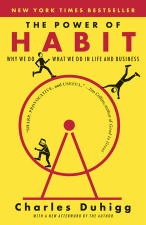

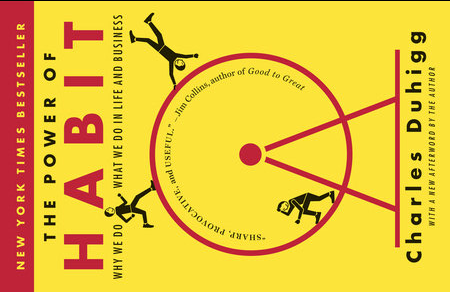

In [ ]:
dirpath = './drive/MyDrive/PR201910807/images/lab07/'

img1 = cv2.imread(dirpath+'book1.png')
img2 = cv2.imread(dirpath+'book2.png')
height = img2.shape[0]
width = img2.shape[1]

##사이즈
img2_resize = cv2.resize(img2,(width//2, height//2))

##회전


M = cv2.getRotationMatrix2D((146, 146), 90, 1)
img2_rot = cv2.warpAffine(img2, M, (height, width))


cv2_imshow(img2_resize)
cv2_imshow(img2_rot)

grayimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayimg2_resize = cv2.cvtColor(img2_resize, cv2.COLOR_BGR2GRAY)
grayimg2_rot = cv2.cvtColor(img2_rot, cv2.COLOR_BGR2GRAY)
## SIFT

sift = cv2.SIFT.create()

keypoints1, descriptor1 = sift.detectAndCompute(grayimg1, None)
keypoints2_resize, descriptor2_resize = sift.detectAndCompute(grayimg2_resize, None)
keypoints2_rot, descriptor2_rot = sift.detectAndCompute(grayimg2_rot, None)

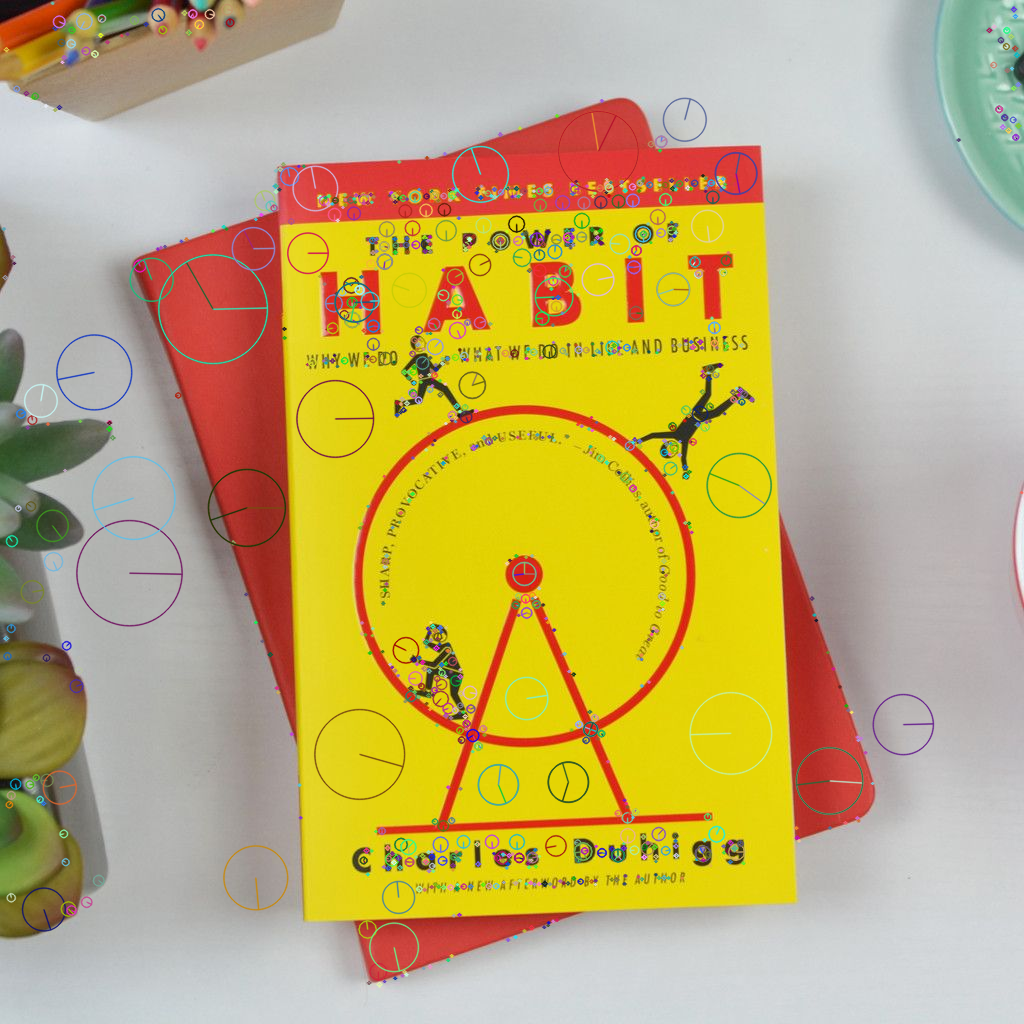

In [ ]:
result1 = cv2.drawKeypoints(img1, keypoints1, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result1)

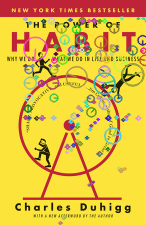

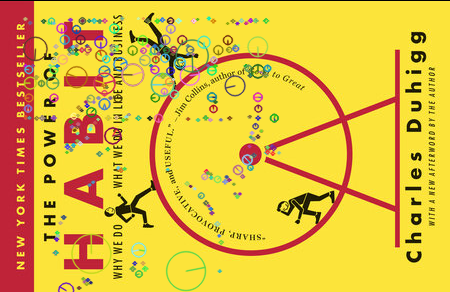

In [ ]:
result2_resize = cv2.drawKeypoints(img2_resize, keypoints2, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result2_resize)

result2_rot = cv2.drawKeypoints(img2_rot, keypoints2, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(result2_rot)

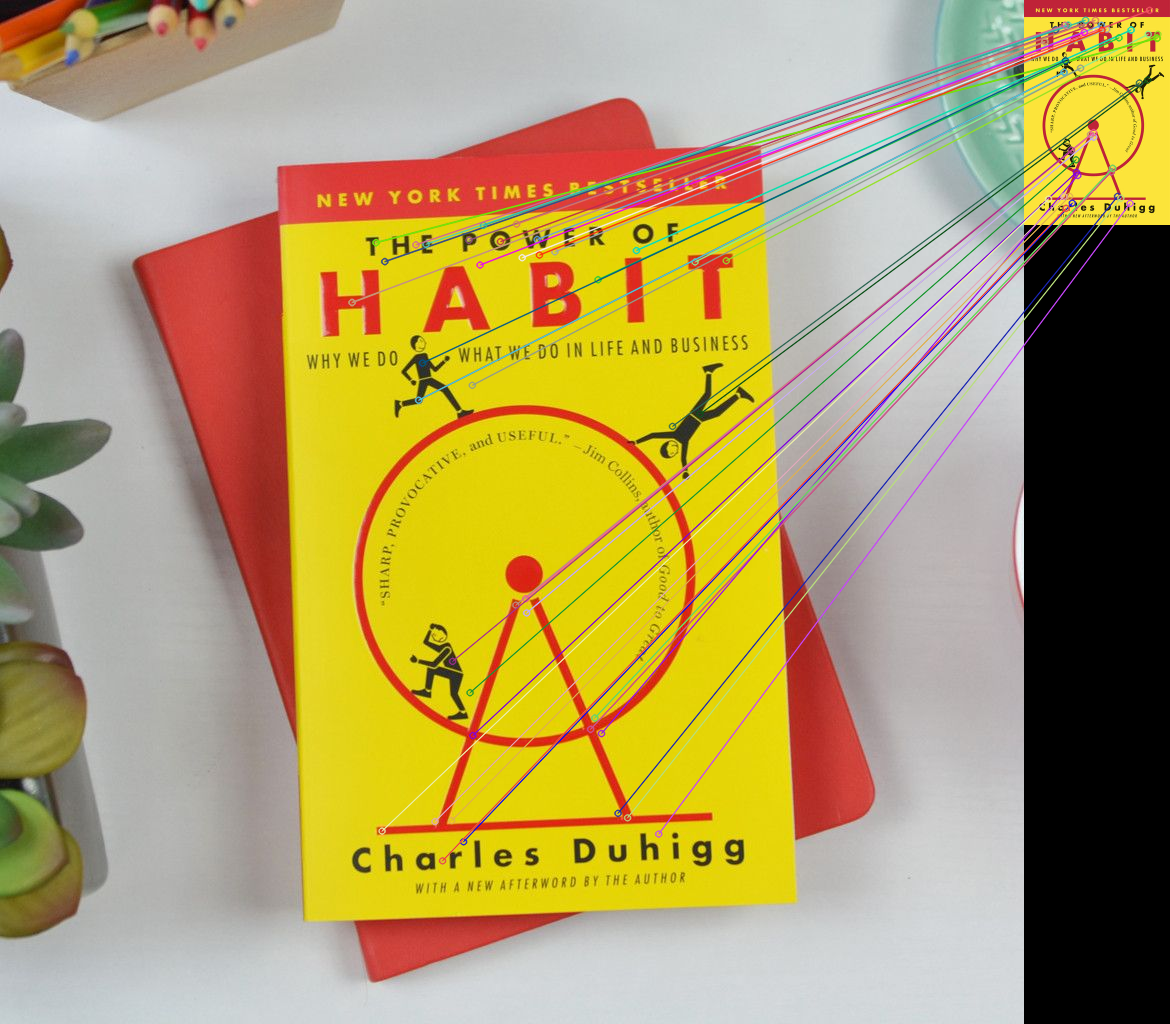

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
matches = bf.match(descriptor1, descriptor2_resize)
matches = sorted(matches, key=lambda x:x.distance)
matched_img = cv2.drawMatches(img1, keypoints1, img2_resize, keypoints2_resize, matches[:50], None,flags=2)
cv2_imshow(matched_img)

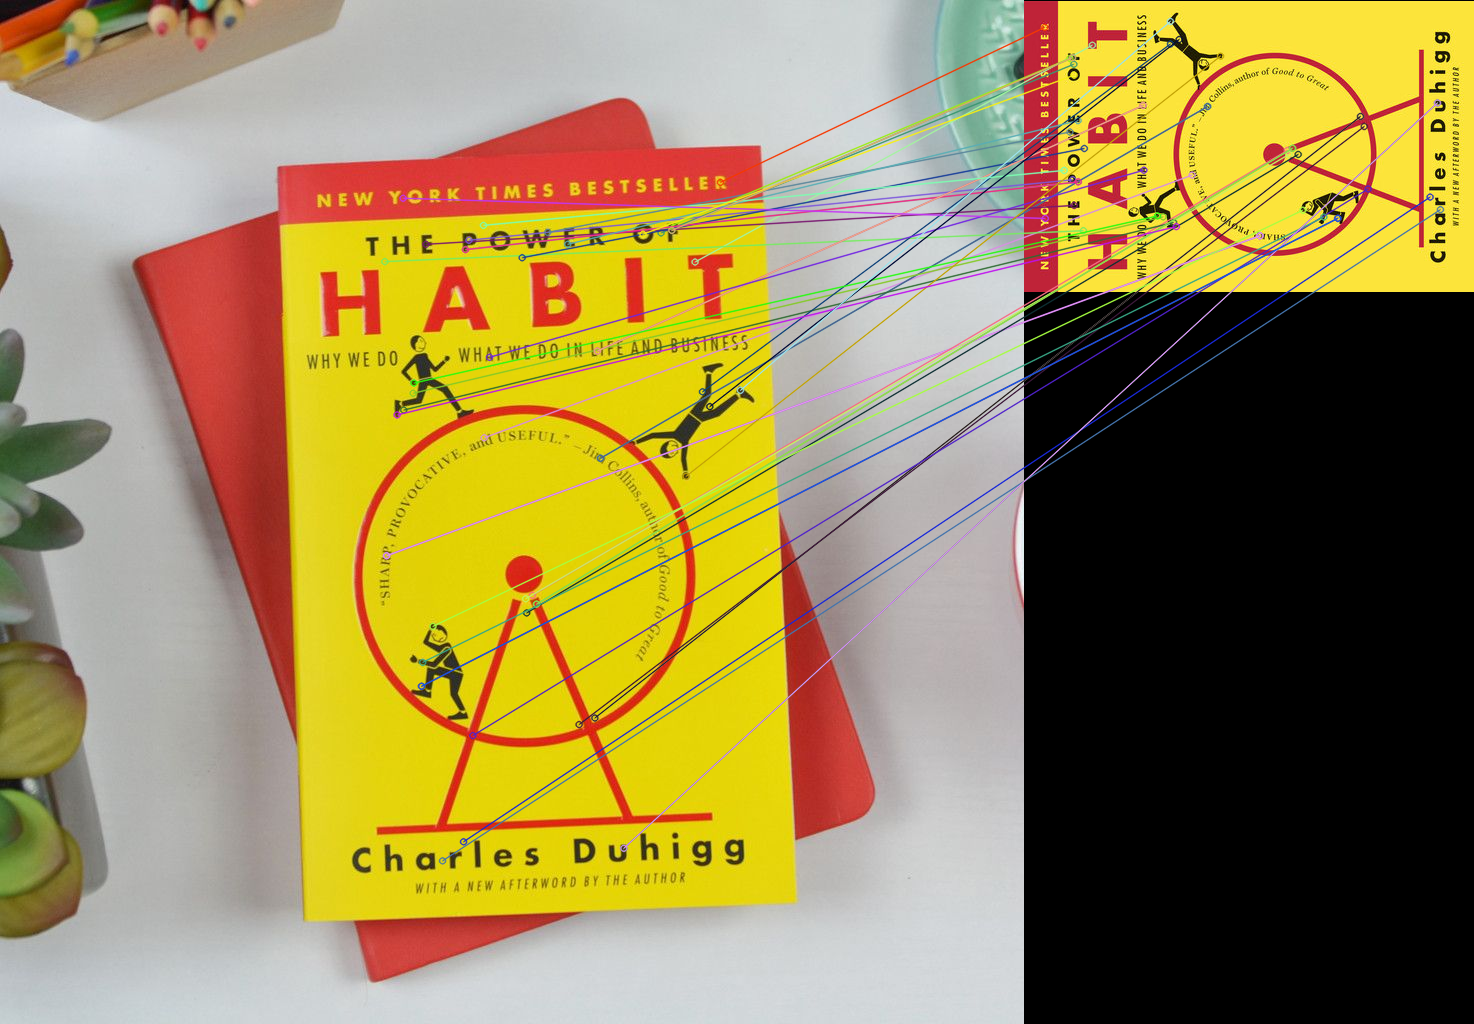

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
matches = bf.match(descriptor1, descriptor2_rot)
matches = sorted(matches, key=lambda x:x.distance)
matched_img = cv2.drawMatches(img1, keypoints1, img2_rot, keypoints2_rot, matches[:50], None,flags=2)
cv2_imshow(matched_img)